<div style="display: flex; justify-content: space-between;width:100%; height:120px;align-items: center; padding:20px; box-sizing:border-box;">
    <h1 style="margin:0;padding:0;" >PyTorch</h1>
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/c6/PyTorch_logo_black.svg" 
alt="PyTorch.log" style="height:110px;margin:0;passing:0;">
</div>

## Creating a Custom Dataset for our files

In [47]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision.transforms import transforms 
import torchvision
from operator import getitem

In [48]:
transformer = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5])]
        
)

 * Examples about how perform the tranformation function [Transform-PyTorch-Examples](https://pytorch.org/vision/main/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py)

In [49]:
# DataLoader
train_path = "./someImage/train"
test_path = "./someImage/val"

training_data = torchvision.datasets.ImageFolder(
    train_path, transform=transformer)
val_data = torchvision.datasets.ImageFolder(
    test_path, transform=transformer)

print("> Training Samples:", len(training_data))
print("> Val Samples:", len(val_data))

batch_size = 256
train_loader = DataLoader(
    training_data, batch_size=batch_size, shuffle=True,
)

val_loader = DataLoader(
    val_data, batch_size=batch_size, shuffle=True
)

print("> Batch Size", batch_size)
print("> Training Batches:", len(train_loader))
print("> Val Batches:", len(val_loader))


> Training Samples: 14034
> Val Samples: 3000
> Batch Size 256
> Training Batches: 55
> Val Batches: 12


To see the shape of the image and its label

In [50]:
img, label = getitem(training_data, 50)
print("Shape: {}, Label: {}".format(img.shape, label))
classes = training_data.classes
print("Classes: ", classes)

Shape: torch.Size([3, 150, 150]), Label: 0
Classes:  ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


* https://www.youtube.com/watch?v=9OHlgDjaE2I
* https://github.com/gaurav67890/Pytorch_Tutorials/blob/master/cnn-scratch-training.ipynb

## Convultion Neural Network
<div style = "width:100%">
    <div style = "display:flex;align-itemn:center; justify-content:center;padding:20px;border-sizing:border-box">
        <img src ="https://www.researchgate.net/publication/323747175/figure/fig1/AS:631607782293603@1527598438946/Convolutional-neural-network-LeNet-5-from-LeCun-et-al-4.png" style = "width:60%;">
    </div>
</div>


One of the advantages of the Convultion Neural Network (CNN), it can learn from *raw data*. 

For this reason, it's common to consider CNN layers as feature extractors: 
* The early layers (those right after the input layer) extract low-level features from raw data, and
* The later layers (often fully connected layers, as in a multilayer perceptron (MLP)) use these features to predict a continuous target value or class label.

Here appear the concept of **feature hieranchy**, where the the lower-level features (in the early layer) are combined to form hight level features (in the later layer).

For the case of the images, lower-level features can be the edges, and the high-level features  like cats or dogs.

### Discrete Convolutions

When the computer reads an image, this is descomposed to layers RGB(Red, Green, Blue) or RGBA. Each layer has a matrix that is the width and the height of the image.

<div class = "main">
    <div class = "blocked" style = "display:flex; align-items: center; justify-content:center">
        <img src = "./assets/doraemon.jpg" style = "width:150px;">
        <span style="display:flex; align-items: center; justify-content:center; flex-direction: column;margin:10px">
            <svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" style="fill: rgba(0, 0, 0, 1)"><path d="m11.293 17.293 1.414 1.414L19.414 12l-6.707-6.707-1.414 1.414L15.586 11H6v2h9.586z"></path></svg>
            <span >Transform</span>
        </span>
        <img src = "./assets/red-green-blue.PNG">
    </div>
</div>



In [51]:
from matplotlib.image import imread
from IPython.display import Image as ImageDisplay

# read the files and convert to numpy arrays by pixel
image_map = imread(r'assets/doraemon.JPG')
image_map = image_map.astype(float) / 255.0
# base to print the image
btp = 'The image of Height: {}px, Weight: {}px is descomposed in tuple color {} (red, green, blue)'
print(btp.format(*image_map.shape))

The image of Height: 497px, Weight: 497px is descomposed in tuple color 3 (red, green, blue)


In [52]:
colors = ['red','green', 'blue']
for i, color in enumerate(colors):
    print(f"{f'Color: {color}':^30}", image_map[:,:, i], sep='\n')

          Color: red          
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
         Color: green         
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
         Color: blue          
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


Discrete Convultion is the operation performs the in CNN to learn from *raw data*.

The first concept that we have to learn is *local piece of pixels* is referred to as the **local receptive field**. This can be understanding with the gif below. For the red matrix (Input Channel red), the *local piece of pixels* would be the small red matrix of shape (3,3) that is slicing on *Input Channel red*

This *local piece of pixels* is multiplied by the `reverse` of the *kernel*. Later we will discuss about it .

We can see that in the matrix (Input Channel red) was added `zeros` around the original matrix. This process is called `padded to zeros`. The number of zeros added is a parameter `p`. It is a tuple `p = (_, _)`, the first is for adding zeros to row and the second to add at column. The most popular setting is `(1, 1)`, that is, this fill around the matrix original 1 layer of zeros.

> This operation (padded zeros) is done with the goal handle the dimentions or shape of matrix ouput called tranformed matrix or output volume.

The other parameter is called `stride` `(_, _)`. This is the number of pixeles which the matrix is *shifted* when this matrix is slicing. The first is for row and the second for the column. For the gif below `s = (1, 1)`.

The another parameter is `out_channel`. This is the volume of convultion output. It corresponds to the number of channels after apply the convultion. For the example below, we have 3 *filters or kernels* , this must match with the number of Input Channels, 3 for this case.  The *out_channel* is similar to out_node, [recall, in a MLP if we had 5 input nodes in the input layer and only one node the hidden layer, that mean we have 5 W's + 1 bias]. Here is similar, we have 3 filters or kernels, one for each color matrix (Input Channel). 

**Determining the size of the convolution output**

Let color matrix and kernel  squared (the columns and the rows are the same), the padding for the rows and columns are the same at $p$ and the shift are the same for the row and column at $s$ .

So $n$ is the lenght of the column of the color matrix, $m$ is the lenght of the column kernel or filter and, $p$ is the padding and $s$ is the shift are previouly defined.

$$o = \frac{n+2p-m}{s} + 1$$



<div align = "center">
    <img src = "./assets/process-convultion.gif" style = "width:700px;">
</div>

The results of the output convultion matrix for each color , those are add to return Output volumen. The gif above don't make the output convultion matrix convultion for each color, it skeep this step and  computing directly the output volume.

In [53]:
from scipy.signal import convolve2d
import numpy as np

In [54]:
colors = ['red', 'green', 'blue']
Ws = {'red': np.array([[1, -1, 1], [1, 1, -1], [-1, 1, 1]]),
      'green': np.array([[-1, 1, -1], [1, -1, 1], [-1, -1, 1]]),
      'blue': np.array([[1, -1, -1], [1, 1, 1], [1, 1, -1]])}

O = np.zeros(shape=(image_map.shape[0], image_map.shape[1]))
for i, color in enumerate(colors):
    print(f"{f'Output Convultion for Color: {color}':^30}")
    print(Conv:=convolve2d(image_map[:, :, i], Ws[color], mode='same'))
    # Then we have to add each output convolution to compute th output  volume
    O += Conv

Output Convultion for Color: red
[[2. 2. 2. ... 2. 2. 0.]
 [2. 3. 3. ... 3. 3. 2.]
 [2. 3. 3. ... 3. 3. 2.]
 ...
 [2. 3. 3. ... 3. 3. 2.]
 [2. 3. 3. ... 3. 3. 2.]
 [2. 2. 2. ... 2. 2. 2.]]
Output Convultion for Color: green
[[ 0.  0.  0. ...  0.  0.  0.]
 [-2. -1. -1. ... -1. -1.  0.]
 [-2. -1. -1. ... -1. -1.  0.]
 ...
 [-2. -1. -1. ... -1. -1.  0.]
 [-2. -1. -1. ... -1. -1.  0.]
 [-2.  0.  0. ...  0.  0.  0.]]
Output Convultion for Color: blue
[[2. 2. 2. ... 2. 2. 0.]
 [4. 3. 3. ... 3. 3. 0.]
 [4. 3. 3. ... 3. 3. 0.]
 ...
 [4. 3. 3. ... 3. 3. 0.]
 [4. 3. 3. ... 3. 3. 0.]
 [4. 4. 4. ... 4. 4. 2.]]


In [55]:
# thi is only for 1 depth and without bias. 
# The models usually pass more depth than 1. and the bias is added as well.
O

array([[4., 4., 4., ..., 4., 4., 0.],
       [4., 5., 5., ..., 5., 5., 2.],
       [4., 5., 5., ..., 5., 5., 2.],
       ...,
       [4., 5., 5., ..., 5., 5., 2.],
       [4., 5., 5., ..., 5., 5., 2.],
       [4., 6., 6., ..., 6., 6., 4.]])

Above pass the `mode = same`. There are other modes, this depend of the combination of `s` and `p`. The most popular is `p = s = (1, 1)`. This combination  is called `same padding`. 

### Subsampling layers

Subsampling is typically applied in two forms of pooling operations in CNNs: max-pooling and mean-pooling (also known as average-pooling). 

The pooling layer is usually denoted by $𝑃_{𝑛_2\text{x}𝑛_1}$. Here, the subscript determines the size of the neighborhood (the number of adjacent pixels in each dimension) where the max or mean operation is performed. We refer to such a neighborhood as the pooling size.

Here, *max-pooling* takes the maximum value from a neighborhood of pixels, and *mean-pooling* computes their average

<div style = "">
    <div style = "display:flex;align-items:center; justify-content:center; flex-direction:column;" >
    <img src = "./assets/pooling.png">
    <span>Sebastian Liu Yuxi </span>
    </div>
</div>


* Pooling (max-pooling) introduces a local invariance. This means that small changes in a local
neighborhood do not change the result of max-pooling.
* Pooling decreases the size of features, which results in higher computational efficiency.

For regularizing an NN we use Dropout

In [56]:
from torch.optim import Adam
from torch.autograd import Variable
import torch.nn as nn

In [57]:
img, label = next(iter(train_loader))

In [58]:
# CNN Network

class ConvNet(nn.Module):
    def __init__(self, num_classes=6):
        super(ConvNet, self).__init__()

        # Output size after convolution filter
        # ((w-f+2P)/s) +1

        # Input shape= (256,3,150,150)

        self.conv1 = nn.Conv2d(
            in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        #Shape= (256,12,150,150)
        self.pool = nn.MaxPool2d(kernel_size=2)

        self.bn1 = nn.BatchNorm2d(num_features=12)
        #Shape= (256,12,150,150)
        self.relu1 = nn.ReLU()
        #Shape= (256,12,150,150)

        self.pool = nn.MaxPool2d(kernel_size=2)
        # Reduce the image size be factor 2
        #Shape= (256,12,75,75)

        self.conv2 = nn.Conv2d(
            in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
        #Shape= (256,20,75,75)
        self.relu2 = nn.ReLU()
        #Shape= (256,20,75,75)

        self.conv3 = nn.Conv2d(
            in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1)

        #Shape= (256,32,75,75)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        #Shape= (256,32,75,75)
        self.relu3 = nn.ReLU()
        #Shape= (256,32,75,75)

        self.fc = nn.Linear(in_features=75 * 75 * 32, out_features=num_classes)

        # Feed forwad function

    def forward(self, input_):
        output = self.conv1(input_)
        output = self.bn1(output)
        output = self.relu1(output)

        output = self.pool(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)
        # Above output will be in matrix form, with shape (256,32,75,75)

        output = output.view(-1, 32*75*75)
        # Resize the array. -1 a comodin to fit the dimention of the rows given
        # the dimentions of the columns, 32*75*75.

        output = self.fc(output)

        return output

In [59]:
model=ConvNet(num_classes=6)

In [60]:
#Optmizer and loss function
import torch.optim as optim

optimizer=optim.SGD(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [61]:
num_epochs=2
#calculating the size of training and testing images
train_count=len(training_data)
val_count=len(val_data)
print(f"Training Samples: {train_count}")
print(f"Val Samples: {val_count}")

Training Samples: 14034
Val Samples: 3000


In [62]:
# Model training and saving best model

best_accuracy = 0.0

for epoch in range(num_epochs):

    # Evaluation and training on training dataset
    # print("I'm here")
    model.train()
    
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.cpu().data*images.size(0)
        # The output is like [[1.2, 0.1, 0.6, 9.6, 0.1, 0.2]]
        # The want to choice the index (the class) where the value is max
        _, prediction = torch.max(outputs.data, 1)
        # Here 1 is refert the row 

        train_accuracy += int(torch.sum(prediction == labels.data))

    train_accuracy = train_accuracy/train_count
    train_loss = train_loss/train_count
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss) +
          ' Train Accuracy: '+str(train_accuracy))

KeyboardInterrupt: 

In [ ]:
# Evaluation on validation dataset
best_accuracy = 0.0
for epoch in range(num_epochs):

    print("I'm here")
    model.eval()

    print("I'm here, After model.eval()")
    val_accuracy = 0.0
    for i, (images, labels) in enumerate(val_loader):
            if torch.cuda.is_available():
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())

            outputs = model(images)
            _, prediction = torch.max(outputs.data, 1)
            val_accuracy += int(torch.sum(prediction == labels.data))

    val_accuracy = val_accuracy/val_count

    print('Epoch: '+str(epoch) + ' Test Accuracy: '+str(val_accuracy))

        # Save the best model
    if val_accuracy > best_accuracy:
            torch.save(model.state_dict(), 'best_checkpoint.model')
            best_accuracy = val_accuracy

I'm here
I'm here, After model.eval()
Epoch: 0 Test Accuracy: 0.5453333333333333
I'm here
I'm here, After model.eval()
Epoch: 1 Test Accuracy: 0.544


In [ ]:
checkpoint = torch.load("best_checkpoint.model")
model = ConvNet(num_classes=6)
model.load_state_dict(checkpoint)
model.eval()

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=6, bias=True)
)

In [ ]:
#Transforms
transformer=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

In [ ]:
#prediction function
def prediction(img_path,transformer):
    
    image=Image.open(img_path)
    
    image_tensor=transformer(image).float()
    
    # add the batch_size dimension
    # This due to the fact the training function expects batches
    image_tensor=image_tensor.unsqueeze_(0)
    
    if torch.cuda.is_available():
        image_tensor.cuda()
        
    input_=Variable(image_tensor)
    
    output=model(input_)
    
    index=output.data.numpy().argmax()
    
    pred=classes[index]
    
    return pred

In [ ]:
from pathlib import Path
from PIL import Image
path_pred = Path('./someImage/pred')
images_path=path_pred.glob('*.jpg')
pred_dict={}
# pred_dict[img.name] = prediction(next(images_path),transformer)
for img in images_path:
    pred_dict[img.name]=prediction(img,transformer)
    break

In [ ]:
pred_dict

{'10004.jpg': 'buildings'}

### Transfer learning for Computer Vision

These two major transfer learning scenarios look as follows:

* `Finetuning the convnet`: Instead of random initialization, we initialize the network with a pretrained network, like the one that is trained on imagenet 1000 dataset. Rest of the training looks as usual.

* `ConvNet as fixed feature extractor`: Here, we will freeze the weights for all of the network except that of the final fully connected layer. This last fully connected layer is replaced with a new one with random weights and only this layer is trained.

Search information about ResNet18
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

### Load Data

We will use torchvision and torch.utils.data packages for loading the data.

The problem we’re going to solve today is to train a model to classify ants and bees. We have about 120 training images each for ants and bees. There are 75 validation images for each class. Usually, this is a very small dataset to generalize upon, if trained from scratch. Since we are using transfer learning, we should be able to generalize reasonably well.

This dataset is a very small subset of imagenet.

In [64]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [65]:
data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [66]:
from operator import getitem

img, label = getitem(image_datasets['val'], 50)
print("Shape: {}, Label: {}".format(img.shape, label))
print("Class: ", class_names[label])

Shape: torch.Size([3, 224, 224]), Label: 0
Class:  ants


### Visualize a few images
Let’s visualize a few training images so as to understand the data augmentations.

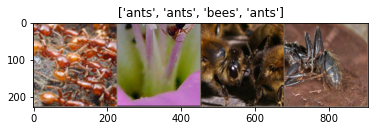

In [67]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    # [3, 228, 906] => [228, 906, 3]
    inp = inp.numpy().transpose((1, 2, 0))
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    # quit the transformation. 
    # Recall, the transformation was (x - mean)/std
    inp = std * inp + mean
    # min = 0, max = 1
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch (of 4 samples) of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch. Here append the matrix image, insted divide them
# [4, 3, 228, 228] => [3, 228, 906]. 
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

### Training the model

Now, let’s write a general function to train a model. Here, we will illustrate:

* Scheduling the learning rate

* Saving the best model

In the following, parameter scheduler is an `LR` scheduler object from `torch.optim.lr_scheduler`.

In [68]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    # copy of the model
    best_model_wts = copy.deepcopy(model.state_dict())
    # the initalize model
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                # inputs.size(0) => is the size of the batch
                # ∑ loss x 4. Why 4? Since the loss is compute for 4 samples, but is only value.
                # This agg loss then we will divide by the total samples 
                # and compute the average loss
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                # scheduler?
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(
        f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

#### How to adjust learning rate

* `torch.optim.lr_scheduler`
  * Provides several methods to adjust the learning rate based on the number of epochs
  * Learning rate scheduling should be applied after optimizer’s update

### Visualizing the model predictions
Generic function to display predictions for a few images

In [69]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    # fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            # print(preds, labels)
            for pred, label in zip(preds, labels):
                print("Predict: ", class_names[pred],
                      "Outcomes: ", class_names[label])
            return
            # for j in range(inputs.size()[0]):
            #     print(preds)
            #     images_so_far += 1
            #     if images_so_far == num_images:
            #         model.train(mode=was_training)

            # for j in range(inputs.size()[0]):
            #     images_so_far += 1
            #     ax = plt.subplot(num_images//2, 2, images_so_far)
            #     ax.axis('off')
            #     ax.set_title(f'predicted: {class_names[preds[j]]}')
            #     imshow(inputs.cpu().data[j])

            #     if images_so_far == num_images:
            #         model.train(mode=was_training)
            #         return
        model.train(mode=was_training)


### Finetuning the convnet
Load a pretrained model and reset final fully connected layer.

`Residual Network with 18 layers` = `ResNet18` 

* This approach optimizes the the residual instead the original data.
  * This allow that the neural network train with more layers (recall, a net can learn more if this more deeper)
    * $a^{(1)} = W^{(1)}X$
    * $a^{(2)} = h^{(1)} = σ(a^{(1)})$
    * $h^{(2)} = σ(W^{(2)}a^{(2)} + X) $ 
* Paper https://arxiv.org/pdf/1512.03385.pdf
* Video https://www.youtube.com/watch?v=ZILIbUvp5lk


In [70]:
from torchvision.models import ResNet18_Weights

In [71]:
model_ft = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
n_classes = 2
model_ft.fc = nn.Linear(num_ftrs, n_classes)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [72]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=2)

Epoch 0/1
----------
train Loss: 0.6320 Acc: 0.6885
val Loss: 0.1651 Acc: 0.9412

Epoch 1/1
----------
train Loss: 0.3921 Acc: 0.8279
val Loss: 0.2251 Acc: 0.9020

Training complete in 1m 42s
Best val Acc: 0.941176


In [73]:
visualize_model(model_ft)

tensor([1, 0, 0, 0]) tensor([1, 0, 0, 0])
Predict:  bees Outcomes:  bees
Predict:  ants Outcomes:  ants
Predict:  ants Outcomes:  ants
Predict:  ants Outcomes:  ants


<Figure size 432x288 with 0 Axes>

### ConvNet as fixed feature extractor

Here, we need to freeze all the network except the final layer. We need to set `requires_grad = False` to freeze the parameters so that the gradients are not computed in `backward()`.

In [ ]:
model_conv = torchvision.models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

### Train and evaluate

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=2)

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

### Applied to Other Data

In [74]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data_transforms = {
    'train': transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5])]),

    'val': transforms.Compose([
        transforms.Resize((150, 150)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5],
            std=[0.5, 0.5, 0.5])])
}

In [76]:
path_init = Path('someImage')
image_datasets = {x: torchvision.datasets.ImageFolder(path_init/x,
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [77]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    # [3, 228, 906] => [228, 906, 3]
    inp = inp.numpy().transpose((1, 2, 0))
    mean=np.array([0.5, 0.5, 0.5])
    std= np.array([0.5, 0.5, 0.5])
    
    # quit the transformation. 
    # Recall, the transformation was (x - mean)/std
    inp = std * inp + mean
    # min = 0, max = 1
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

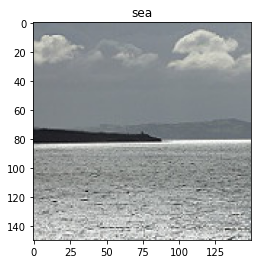

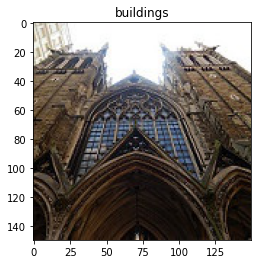

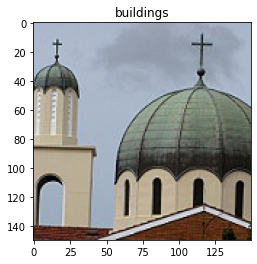

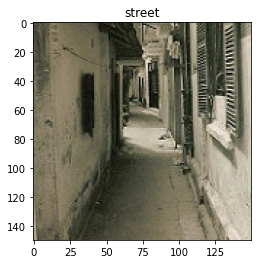

In [78]:
indices = np.random.randint(0, len(dataloaders['train'].dataset), 4)

for index in indices:
    img, label = getitem(dataloaders['train'].dataset, index)
    imshow(img, class_names[label])

In [81]:
model_ft = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
n_classes = 6
model_ft.fc = nn.Linear(num_ftrs, n_classes)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [82]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=2)

Epoch 0/1
----------
train Loss: 0.7050 Acc: 0.7623
val Loss: 0.4988 Acc: 0.8460

Epoch 1/1
----------
train Loss: 0.4577 Acc: 0.8538
val Loss: 0.2634 Acc: 0.9080

Training complete in 41m 13s
Best val Acc: 0.908000


In [83]:
visualize_model(model_ft)

tensor([4, 2, 1, 0]) tensor([4, 3, 1, 0])
Predict:  sea Outcomes:  sea
Predict:  glacier Outcomes:  mountain
Predict:  forest Outcomes:  forest
Predict:  buildings Outcomes:  buildings


<Figure size 432x288 with 0 Axes>

### GoogleNets
Search more information about GoogleNets

image: https://i.stack.imgur.com/Xqv0n.png

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()

In [ ]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

In [ ]:
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(len(output[0]))

In [ ]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

In [ ]:
import pandas as pd
import os

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 1])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
dataSetCustom = CustomImageDataset(
    annotations_file='someImage.txt',
    img_dir='someImage')


In [ ]:
dataSetCustom
train, test = torch.utils.data.random_split(dataSetCustom, [2, 2])
# train, test = torch.utils.data.random_split(range(10), [5, 5])

In [ ]:
for i in train.indices:
    print(i)

In [ ]:
img, label = getitem(dataSetCustom, 0)